# Topic Modeling with LDA using gensim
## This is just to compare with our original implementation of LDA for topic modeling
## Please install nltk, scikit, gensim, matplotlib, numpy to run the below

In [78]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

doc_complete = [doc1, doc2, doc3, doc4, doc5]

#print(doc_complete, len(doc_complete))

In [79]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]
#print (doc_clean)

[['sugar', 'bad', 'consume', 'sister', 'like', 'sugar', 'father'], ['father', 'spends', 'lot', 'time', 'driving', 'sister', 'around', 'dance', 'practice'], ['doctor', 'suggest', 'driving', 'may', 'cause', 'increased', 'stress', 'blood', 'pressure'], ['sometimes', 'feel', 'pressure', 'perform', 'well', 'school', 'father', 'never', 'seems', 'drive', 'sister', 'better'], ['health', 'expert', 'say', 'sugar', 'good', 'lifestyle']]


In [82]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
#print (doc_term_matrix)
#print (len(doc_term_matrix))

[(0, '0.045*"sister" + 0.045*"father" + 0.045*"pressure"'), (1, '0.065*"father" + 0.065*"sister" + 0.065*"driving"'), (2, '0.085*"sugar" + 0.048*"cause" + 0.048*"doctor"')]
[0 1 2 3 4 5 6 7 8]


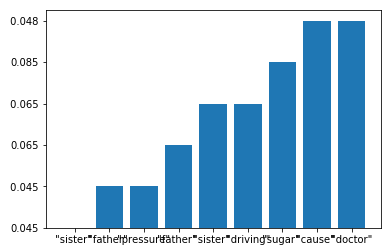

<Figure size 12240x10800 with 0 Axes>

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

#print(ldamodel.print_topics(num_topics=3, num_words=3))
#fig, ax = plt.subplots()
data = (ldamodel.print_topics(num_topics=3, num_words=3))
stat = []
caption = []
print (data)
for eachData in data:
    one = eachData[1].split('+')
    for eachOne in one:
        #print (eachOne.split('*')[0], eachOne.split('*')[1])
        stat.append(eachOne.split('*')[0])
        caption.append(eachOne.split('*')[1])
#print (stat, caption)

x = np.arange(len(stat))
print (x)
plt.bar(x, stat)
plt.xticks(x, caption)
plt.figure(figsize=(170,150))
plt.show()